# Cruise Control: System Analysis



## System model and parameters

The transfer function model for the cruise control problem is given below.  Please see the [Cruise Control: System Modeling](../CruiseControl/CruiseControl-SystemModeling.ipynb) page for the derivation. 

$$
 P(s) = \frac{V(s)}{U(s)} = \frac{1}{ms+b}  \qquad  [ \frac{m/s}{N} ] 
$$

The parameters used in this example are as follows:

```
(m)   vehicle mass            1000 kg
(b)   damping coefficient     50 N.s/m
(u)   nominal control force   500 N
```


## Performance specifications

The next step is to come up with some **design criteria** that the compensated system should achieve. When the engine gives a 500 Newton force, the car will reach a maximum velocity of 10 m/s (22 mph), see open-loop step response section below. An automobile should be able to accelerate up to that speed in less than 5 seconds. In this application, a 10% overshoot and 2% steady-state error on the velocity are sufficient. Keeping the above in mind, we have proposed the following design criteria for this problem: 

- Rise time < 5 s 
- Overshoot < 10 
- Steady-state error < 2 

## Open-loop step response

The **open-loop** response of the system, without any feedback control, to a step input force of 500 Newtons is simulated in Python as follows:

In [1]:
import control
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
m = 1000
b = 50
u = 500
s = control.TransferFunction.s
P_cruise = 1 / (m * s + b)
P_cruise

TransferFunction(array([1]), array([1000,   50]))

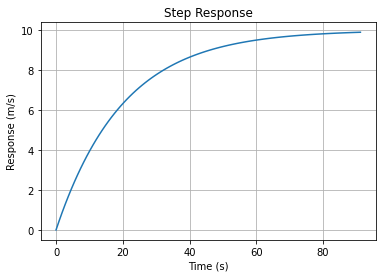

In [3]:
T, yout = control.step_response(sys=u * P_cruise)
plt.plot(T, yout)
plt.xlabel("Time (s)")
plt.ylabel("Response (m/s)")
plt.title("Step Response")
plt.grid("on")

We see that the open-loop system exhibits no overshoot or oscillations (characteristic of first-order systems), and does reach the desired steady-state speed of 10 m/s; however, the rise time is much too slow, ~60 s.  Therefore we need to design a feedback controller which speeds up the response significantly without negatively affecting the other dynamic performance metrics. 

## Open-loop poles/zeros

The cruise control system has a single pole at s = -b/m which we can see plotted on the s-plane using the following MATLAB commands:

(-1.0, 1.0, -1.0, 1.0)

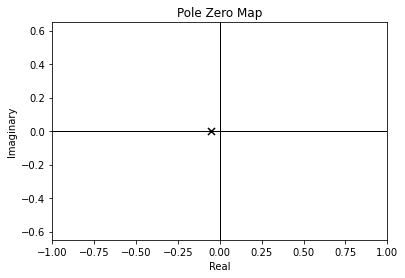

In [4]:
poles, _ = control.pzmap(P_cruise, grid=False)
poles
plt.axis([-1, 1, -1, 1])

We observe that the **open-loop** system is stable and does not oscillate since the pole is real and negative.  Furthermore, the speed of response is determined by the magnitude of this pole, |b/m|: the larger the magnitude, the quicker the system approaches the steady-state value. Since we're typically not able to change the system parameters to change the dynamic response of the system, we must instead design controllers which alter the poles and zeros of the **closed-loop** system to meet the desired performance specifications. 

## Open-loop Bode plot

We are also interested in the open-loop frequency response of the system which we find using the following command:

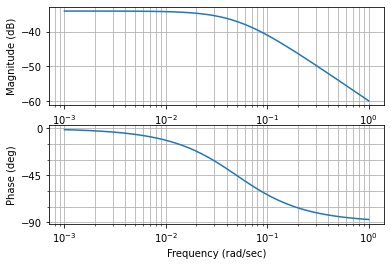

In [5]:
mag, phase, omega = control.bode(P_cruise, plot=True, dB=True)

We see that the Bode plots exhibit the definitive features of [first-order systems](https://nbviewer.jupyter.org/github/dapperfu/UMich_Controls_Tutorials_Python/blob/main/Introduction/Introduction_SystemAnalysis.ipynb#First-Order-Systems), including a -3 dB magnitude and -45 deg phase at the corner frequency of w = b/m = 0.05 rad/s and -20 dB/dec roll-off at high frequencies. 